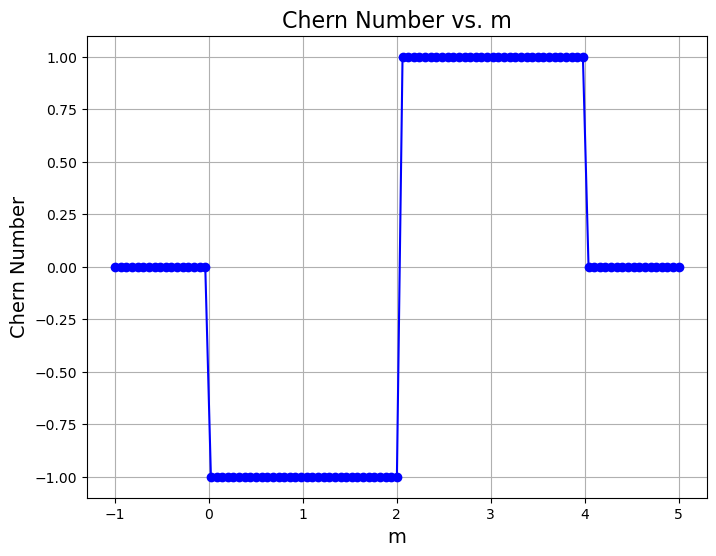

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def hamiltonian(kx, ky, m):
    d_x = np.sin(kx)
    d_y = np.sin(ky)
    d_z = m + np.cos(kx) + np.cos(ky) - 2
    Hk = np.array([[d_z, d_x - 1j*d_y],
                   [d_x + 1j*d_y, -d_z]], dtype=complex)
    return Hk

def compute_chern_number(Nk, m):
    k_vals = np.linspace(-np.pi, np.pi, Nk, endpoint=False)
    # Array to store eigenvectors of the lower band
    eigvecs = np.zeros((Nk, Nk, 2), dtype=complex)
    
    for i, kx in enumerate(k_vals):
        for j, ky in enumerate(k_vals):
            Hk = hamiltonian(kx, ky, m)
            # Eigenvalues and eigenvectors; lower band is the one with the lower eigenvalue
            vals, vecs = np.linalg.eigh(Hk)
            eigvecs[i, j, :] = vecs[:, 0]
    
    # Define U(1) link variable between neighboring eigenstates
    def U_link(psi1, psi2):
        overlap = np.vdot(psi1, psi2)
        return overlap / np.abs(overlap)
    
    F = np.zeros((Nk, Nk))
    for i in range(Nk):
        for j in range(Nk):
            ip = (i + 1) % Nk  # periodic boundary in kx
            jp = (j + 1) % Nk  # periodic boundary in ky
            U1 = U_link(eigvecs[i, j], eigvecs[ip, j])
            U2 = U_link(eigvecs[ip, j], eigvecs[ip, jp])
            U3 = U_link(eigvecs[ip, jp], eigvecs[i, jp])
            U4 = U_link(eigvecs[i, jp], eigvecs[i, j])
            F[i, j] = np.angle(U1 * U2 * U3 * U4)
    
    Chern = np.sum(F) / (2 * np.pi)
    return np.round(Chern, 4)

Nk = 50
m_values = np.linspace(-1, 5, 101)
chern_numbers = []


for m in m_values:
    C = compute_chern_number(Nk, m)
    chern_numbers.append(C)

plt.figure(figsize=(8, 6))
plt.plot(m_values, chern_numbers, marker='o', linestyle='-', color='b')
plt.xlabel('m', fontsize=14)
plt.ylabel('Chern Number', fontsize=14)
plt.title('Chern Number vs. m', fontsize=16)
plt.grid(True)
plt.show()
